In [1]:
import os
import PIL.Image
import numpy as np
import torch, Janus
from transformers import AutoModelForCausalLM
from janus.models import MultiModalityCausalLM, VLChatProcessor
from janus.utils.io import load_pil_images

Python version is above 3.10, patching the collections module.


/blue/changzhao/haoyuliao/.conda/envs/hao-janus/lib/python3.10/site-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


<h1>Load model<h1/>

In [2]:
# specify the path to the model
model_path = "./ModelsParmeters/Janus-Pro-7B"#"deepseek-ai/Janus-Pro-7B"
vl_chat_processor: VLChatProcessor = VLChatProcessor.from_pretrained(model_path)
tokenizer = vl_chat_processor.tokenizer

vl_gpt: MultiModalityCausalLM = AutoModelForCausalLM.from_pretrained(
    model_path, trust_remote_code=True
)
vl_gpt = vl_gpt.to(torch.bfloat16).cuda().eval()

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
Some kwargs in processor config are unused and will not have any effect: add_special_token, num_image_tokens, image_

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

<h1>Unified Multimodal Understanding<h1/>

In [50]:
def filterAns(answer):
    answer = answer.lower()
    if "hiking" in answer:
        return "hiking"
    
    if "biking" in answer:
        return "biking"
    
    if "boating" in answer:
        return "boating"
    
    if "camping" in answer:
        return "camping"
    
    if "fishing" in answer:
        return "fishing"
    
    if "horseback riding" in answer:
        return "horseback riding"
    
    if "hunting" in answer:
        return "hunting"
    
    if "shelling" in answer:
        return "shelling"
    
    if "surfing" in answer:
        return "surfing"
    
    if "swimming" in answer:
        return "swimming"
    
    if "wildlife Viewing" in answer:
        return "wildlife Viewing"
    
    if "landscape aesthetics" in answer:
        return "landscape aesthetics"
    
    return "No_CES"



question = "Cultural ecosystem services (CES) are intangible, non-material benefits derived from nature through direct human outdoor interactions with the natural environment. In this study, we are interested in detecting 12 CES classes: Hiking, Biking, Boating, Camping, Fishing, Horseback Riding, Hunting, Shelling, Surfing, Swimming, Wildlife Viewing, Landscape Aesthetics. We define each class as follow. Hiking: the activity of going for long walks, especially in the country or woods. Biking: the activity of riding a bicycle. Boating: rowing or sailing in boats as a sport or form of recreation. Camping: the activity of spending a vacation living in a camp, tent, or camper. Fishing: the activity of catching fish. Horse riding: the sport or activity of riding horses. Hunting: the activity of hunting wild animals. Shelling: activity of collecting seashells. Surfing: the sport or pastime of riding a wave towards the shore while standing or lying on a surfboard. Swimming: swimming. Wildlife viewing: the act of observing wild animals and plants in their natural environment. Landscape aesthetics: the enjoyment and pleasure felt through the observation of environmental scenery. Now determine if an image contains one of the above 12 CES activities. If yes, tell me which class it belongs to. Only give me short answers, no need to provide the reasoning."


#question = "Describe the image."
#question = "Do you see people is hiking?" #Now, dertermine which CES. Cultural ecosystem services (CES) are intangible, non-material benefits derived from nature through direct human outdoor interactions with the natural environment. In this study, we are interested in detecting 12 CES classes: Hiking, Biking, Boating, Camping, Fishing, Horseback Riding, Hunting, Shelling, Surfing, Swimming, Wildlife Viewing, Landscape Aesthetics. We define each class as follow. Hiking: the activity of going for long walks, especially in the country or woods. Biking: the activity of riding a bicycle. Boating: rowing or sailing in boats as a sport or form of recreation. Camping: the activity of spending a vacation living in a camp, tent, or camper. Fishing: the activity of catching fish. Horse riding: the sport or activity of riding horses. Hunting: the activity of hunting wild animals. Shelling: activity of collecting seashells. Surfing: the sport or pastime of riding a wave towards the shore while standing or lying on a surfboard. Swimming: swimming. Wildlife viewing: the act of observing wild animals and plants in their natural environment. Landscape aesthetics: the enjoyment and pleasure felt through the observation of environmental scenery. Now determine if an image contains one of the above 12 CES activities. If yes, tell me which class it belongs to. Only give me short answers, no need to provide the reasoning."
#question = "Do you see Landscape Aesthetics (the enjoyment and pleasure felt through the observation of environmental scenery)?"
#Hiking, Biking, Boating, Camping, Fishing, Horseback Riding, Hunting, Shelling, Surfing, Swimming, Wildlife Viewing, Landscape Aesthetics?"

#question = "Do you see people is biking defiend this is a person riding a bicycle, a bike, or biking equipment off-road and over rough terrain and mountain trails?"



#question = "Cultural ecosystem services (CES) are intangible, non-material benefits derived from nature through direct human outdoor interactions with the natural environment. In this study, we are interested in detecting 12 CES classes: Hiking, Biking, Boating, Camping, Fishing, Horseback Riding, Hunting, Shelling, Surfing, Swimming, Wildlife Viewing, Landscape Aesthetics. We define each class as follow. Hiking: the activity of going for long walks, especially in the country or woods. Biking: the activity of riding a bicycle. Boating: rowing or sailing in boats as a sport or form of recreation. Camping: the activity of spending a vacation living in a camp, tent, or camper. Fishing: the activity of catching fish. Horse riding: the sport or activity of riding horses. Hunting: the activity of hunting wild animals. Shelling: activity of collecting seashells. Surfing: the sport or pastime of riding a wave towards the shore while standing or lying on a surfboard. Swimming: swimming. Wildlife viewing: the act of observing wild animals and plants in their natural environment. Landscape aesthetics: the enjoyment and pleasure felt through the observation of environmental scenery. Now determine if an image contains one of the above 12 CES activities. If yes, tell me which class it belongs to. Only give me short answers, no need to provide the reasoning."
#question = "Cultural ecosystem services (CES) are intangible, non-material benefits derived from nature through direct human outdoor interactions with the natural environment. In this study, we are interested in detecting 12 CES classes: Hiking, Biking, Boating, Camping, Fishing, Horseback Riding, Hunting, Shelling, Surfing, Swimming, Wildlife Viewing, Landscape Aesthetics. We define each class as follow. Hiking: the activity of going for long walks, especially in the country or woods. Biking: the activity of riding a bicycle. Boating: rowing or sailing in boats as a sport or form of recreation. Camping: the activity of spending a vacation living in a camp, tent, or camper. Fishing: the activity of catching fish. Horse riding: the sport or activity of riding horses. Hunting: the activity of hunting wild animals. Shelling: activity of collecting seashells. Surfing: the sport or pastime of riding a wave towards the shore while standing or lying on a surfboard. Swimming: swimming. Wildlife viewing: the act of observing wild animals and plants in their natural environment. Landscape aesthetics: the enjoyment and pleasure felt through the observation of environmental scenery. Now determine if an image contains one of the above 12 CES activities. If yes, tell me which class it belongs to. If not belog 12 CES activities, reply No CES. Only give me short answers for which class, no need to provide the reasoning."


#image_path = "./832_49357079873_actual_Boating.png"
#image_path = "./5241_27602172055_actual_No_CES.png"
#image_path = "./CES_Images//4582_50030005647_actual_Shelling.png"
#image_path = "./CES_Images//5059_35451390872_actual_No_CES.png"
#image_path = "./CES_Images//5027_12179796394_actual_No_CES.png"
#image_path = "./CES_Images//5051_28946084657_actual_No_CES.png"
#image_path = "./CES_Images//832_49357079873_actual_Boating.png"

conversation = [
    {
        "role": "<|User|>",
        "content": f"<image_placeholder>\n{question}",
        "images": [image_path],
    },
    {"role": "<|Assistant|>", "content": ""},
]

# load images and prepare for inputs
pil_images = load_pil_images(conversation)
prepare_inputs = vl_chat_processor(
    conversations=conversation, images=pil_images, force_batchify=True
).to(vl_gpt.device)

# # run image encoder to get the image embeddings
inputs_embeds = vl_gpt.prepare_inputs_embeds(**prepare_inputs)

# # run the model to get the response
outputs = vl_gpt.language_model.generate(
    inputs_embeds=inputs_embeds,
    attention_mask=prepare_inputs.attention_mask,
    pad_token_id=tokenizer.eos_token_id,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=512,
    do_sample=False,
    use_cache=True,
)

answer = tokenizer.decode(outputs[0].cpu().tolist(), skip_special_tokens=True)
print(f"{prepare_inputs['sft_format'][0]}", answer)
filter_answer =filterAns(answer)
print(filter_answer)

You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.

<|User|>: <image_placeholder>
Cultural ecosystem services (CES) are intangible, non-material benefits derived from nature through direct human outdoor interactions with the natural environment. In this study, we are interested in detecting 12 CES classes: Hiking, Biking, Boating, Camping, Fishing, Horseback Riding, Hunting, Shelling, Surfing, Swimming, Wildlife Viewing, Landscape Aesthetics. We define each class as follow. Hiking: the activity of going for long walks, especially in the country or woods. Biking: the activity of riding a bicycle. Boating: rowing or sailing in boats as a sport or form of recreation. Camping: the activity of spending a vacation living in a camp, tent, or camper. Fishing: the activity of catching fish. Horse riding: the sport or activity of riding horses. Hunting: the acti

In [48]:
"Landscape Aesthetics" in answer

True

In [44]:
"Landscape Aesthetics" in "Yes, the image belongs to Landscape Aesthetics."

True

In [32]:
import re

def filterAns(answer):
    if "Yes" in answer:
        number = re.findall(r'\d+', answer)  # Finds all sequences of digits
        if int(number[0]) > 0:
            return number[0] #f"Yes, {number[0]}"
        else:
            return 0
    else:
        
        return 0 #"No"

#image_path = "./CES_Images//5123_34165957435_actual_No_CES.png"
#image_path = "./CES_Images//832_49357079873_actual_Boating.png"
#image_path = "./CES_Images//5027_12179796394_actual_No_CES.png"
#image_path = "./CES_Images//5051_28946084657_actual_No_CES.png"
#image_path = "./CES_Images//4582_50030005647_actual_Shelling.png"
#image_path = "./CES_Images//2511_12531739954_actual_Shelling.png"
#image_path = "./CES_Images//5024_48100184206_actual_No_CES.png"

acts = ["hiking", "biking", "boating", "camping", "fishing", "horseback riding", 
             "hunting", "people picking shells or showing shells", "surfing on water", "swimming", "wildlife Viewing", "landscape aesthetics"#"natural of beauty without humanio consturctions"#"landscape aesthetics"
            ]

acts = ["hiking", "biking", "boating", "camping", "fishing", "horseback riding", 
             "hunting", "seashells", "surfing on water", "swimming", "wildlife Viewing", "landscape aesthetics"#"natural of beauty without humanio consturctions"#"landscape aesthetics"
            ]

#acts = ["seashells"]

res = {}

for act in acts:
    #question = f"Is the image a {ques}? Only give me a Yes or No and provide your confidence level."
    #question = f"Is the image a {ques}? Provide your confidence numbers." #Please reply the foramt: Yes/ No: Your confidence numbers"# with a 100% scale."
    #question = f"Is the image a {ques}? Give me your confidence numbers from 1 to 100." #Please reply the foramt: Yes/ No: Your confidence numbers"# with a 100% scale."
    #question = f"Is the image a {ques}? Please reply Yes/NO, confidence scores from 1 to 100"
    #question = f"If the image shows a {act}? If Yes, give me a confidence score from 1 to 100" #, and yes or no"
    question = f"If the image shows a {act}, reply yes with reasoning and give me a confidence score from 1 to 100" #, and yes or no"
    #Only give me your confidence score from 1 to 100. Yes or No. Only give me short answers, no need to provide the reasoning." #Please reply the foramt: Yes/ No: Your confidence numbers"# with a 100% scale."
    
    conversation = [
        {
            "role": "<|User|>",
            "content": f"<image_placeholder>\n{question}",
            "images": [image_path],
        },
        {"role": "<|Assistant|>", "content": ""},
    ]

    # load images and prepare for inputs
    pil_images = load_pil_images(conversation)
    prepare_inputs = vl_chat_processor(
        conversations=conversation, images=pil_images, force_batchify=True
    ).to(vl_gpt.device)

    # # run image encoder to get the image embeddings
    inputs_embeds = vl_gpt.prepare_inputs_embeds(**prepare_inputs)

    # # run the model to get the response
    outputs = vl_gpt.language_model.generate(
        inputs_embeds=inputs_embeds,
        attention_mask=prepare_inputs.attention_mask,
        pad_token_id=tokenizer.eos_token_id,
        bos_token_id=tokenizer.bos_token_id,
        eos_token_id=tokenizer.eos_token_id,
        max_new_tokens=512,
        do_sample=False,
        use_cache=True,
    )

    answer = tokenizer.decode(outputs[0].cpu().tolist(), skip_special_tokens=True)
    filter_answer = filterAns(answer)
    print(f"{prepare_inputs['sft_format'][0]}", answer)
    print(filter_answer)
    res[act] = filter_answer


You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.

<|User|>: <image_placeholder>
If the image shows a hiking, reply yes with reasoning and give me a confidence score from 1 to 100

<|Assistant|>: No, the image does not show a hiking scene. The image depicts a group of people on a boat on a body of water, likely a river or lake, surrounded by natural scenery such as trees and reeds. The people are wearing casual clothing and appear to be enjoying a boat tour or excursion. There are no signs of hiking gear, such as backpacks, hiking boots, or trekking poles. Therefore, the answer is no, and the confidence score is 0.
0
You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.

<|User|>: <image_placeholder>
If the image shows a

In [33]:
res

{'hiking': 0,
 'biking': 0,
 'boating': '95',
 'camping': 0,
 'fishing': 0,
 'horseback riding': 0,
 'hunting': 0,
 'seashells': 0,
 'surfing on water': 0,
 'swimming': 0,
 'wildlife Viewing': '95',
 'landscape aesthetics': '95'}

<h1>Text2image<h1/>

In [136]:
Description = "A stunning princess from kabul in red, white traditional clothing, blue eyes, brown hair"
Description = "A cute girl with cat ears, white long hair, red eyes."

conversation = [
    {
        "role": "<|User|>",
        "content": f"{Description}",
    },
    {"role": "<|Assistant|>", "content": ""},
]

sft_format = vl_chat_processor.apply_sft_template_for_multi_turn_prompts(
    conversations=conversation,
    sft_format=vl_chat_processor.sft_format,
    system_prompt="",
)
prompt = sft_format + vl_chat_processor.image_start_tag


@torch.inference_mode()
def generate(
    mmgpt: MultiModalityCausalLM,
    vl_chat_processor: VLChatProcessor,
    prompt: str,
    temperature: float = 1,
    parallel_size: int = 16,
    cfg_weight: float = 5,
    image_token_num_per_image: int = 576,
    img_size: int = 384,
    patch_size: int = 16,
):
    input_ids = vl_chat_processor.tokenizer.encode(prompt)
    input_ids = torch.LongTensor(input_ids)

    tokens = torch.zeros((parallel_size*2, len(input_ids)), dtype=torch.int).cuda()
    for i in range(parallel_size*2):
        tokens[i, :] = input_ids
        if i % 2 != 0:
            tokens[i, 1:-1] = vl_chat_processor.pad_id

    inputs_embeds = mmgpt.language_model.get_input_embeddings()(tokens)

    generated_tokens = torch.zeros((parallel_size, image_token_num_per_image), dtype=torch.int).cuda()

    for i in range(image_token_num_per_image):
        outputs = mmgpt.language_model.model(inputs_embeds=inputs_embeds, use_cache=True, past_key_values=outputs.past_key_values if i != 0 else None)
        hidden_states = outputs.last_hidden_state
        
        logits = mmgpt.gen_head(hidden_states[:, -1, :])
        logit_cond = logits[0::2, :]
        logit_uncond = logits[1::2, :]
        
        logits = logit_uncond + cfg_weight * (logit_cond-logit_uncond)
        probs = torch.softmax(logits / temperature, dim=-1)

        next_token = torch.multinomial(probs, num_samples=1)
        generated_tokens[:, i] = next_token.squeeze(dim=-1)

        next_token = torch.cat([next_token.unsqueeze(dim=1), next_token.unsqueeze(dim=1)], dim=1).view(-1)
        img_embeds = mmgpt.prepare_gen_img_embeds(next_token)
        inputs_embeds = img_embeds.unsqueeze(dim=1)


    dec = mmgpt.gen_vision_model.decode_code(generated_tokens.to(dtype=torch.int), shape=[parallel_size, 8, img_size//patch_size, img_size//patch_size])
    dec = dec.to(torch.float32).cpu().numpy().transpose(0, 2, 3, 1)

    dec = np.clip((dec + 1) / 2 * 255, 0, 255)

    visual_img = np.zeros((parallel_size, img_size, img_size, 3), dtype=np.uint8)
    visual_img[:, :, :] = dec

    os.makedirs('generated_samples', exist_ok=True)
    for i in range(parallel_size):
        save_path = os.path.join('generated_samples', "img_{}.jpg".format(i))
        PIL.Image.fromarray(visual_img[i]).save(save_path)


generate(
    vl_gpt,
    vl_chat_processor,
    prompt,
)

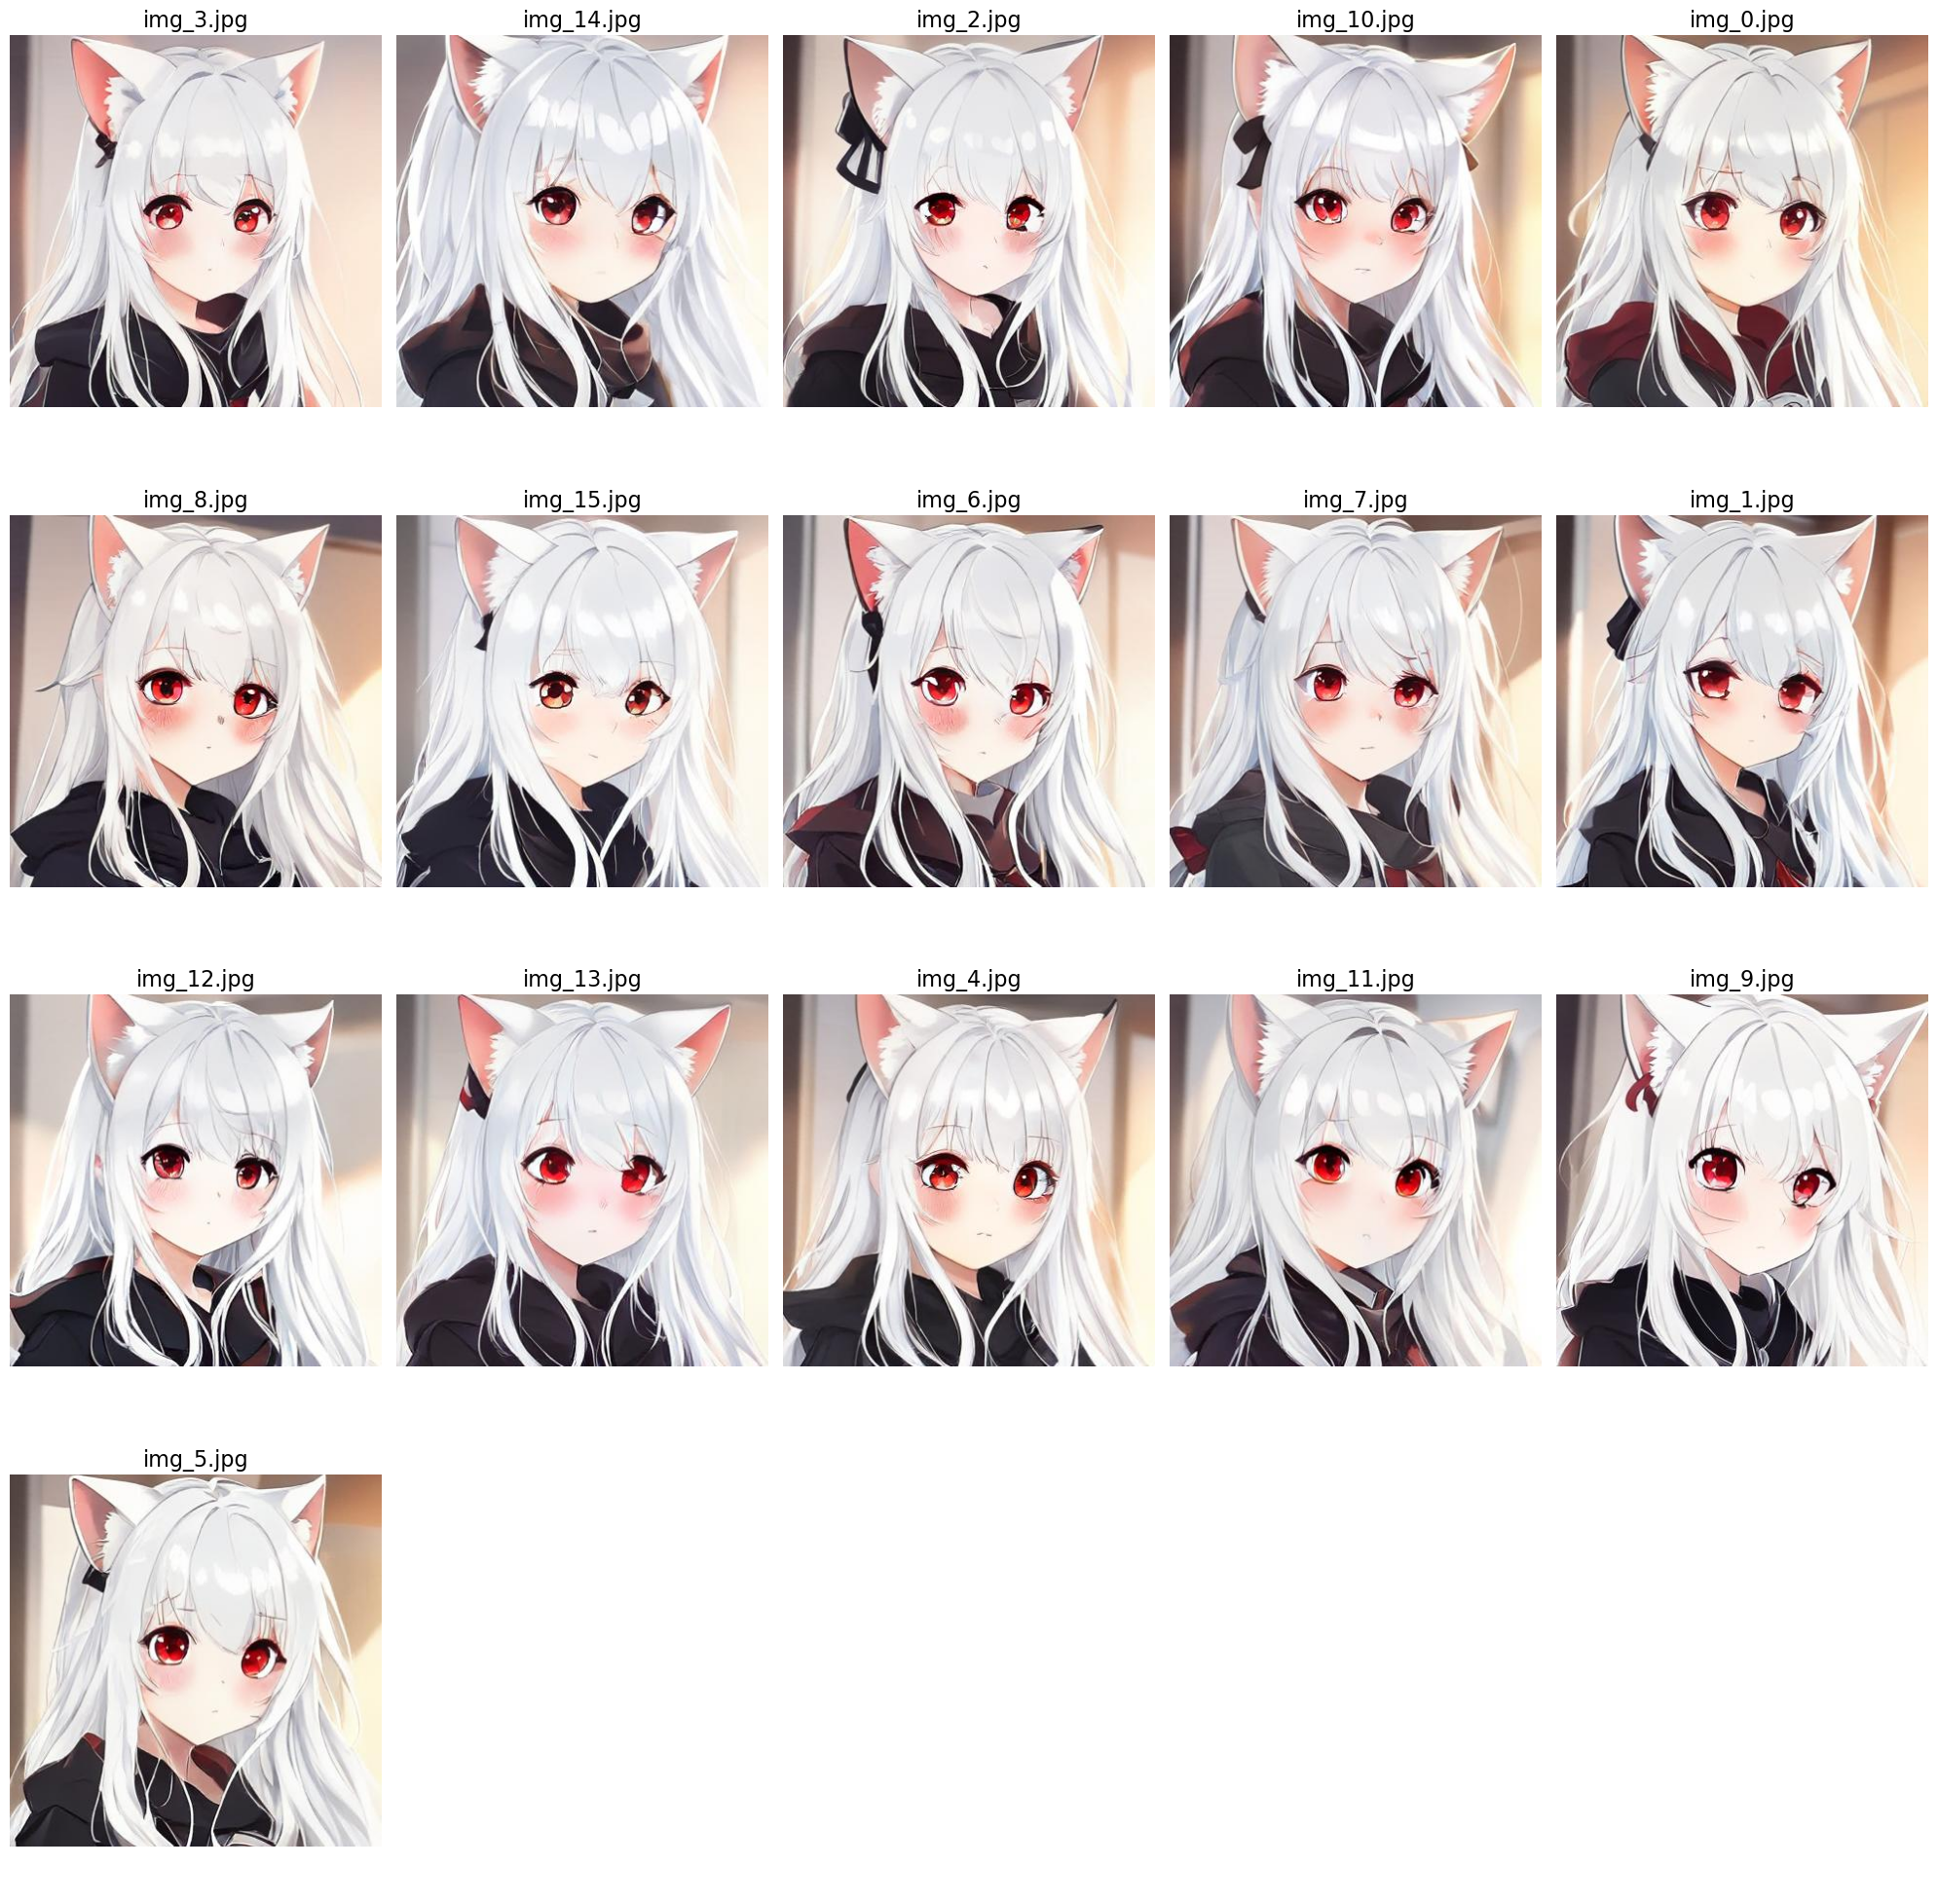

In [137]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get all JPG images from the directory
imgs = glob.glob("./generated_samples/*.jpg")

# Calculate number of rows needed (5 images per row)
num_images = len(imgs)
rows = (num_images + 4) // 5  # Ceiling division

# Create a figure with subplots
fig, axes = plt.subplots(rows, 5, figsize=(20, 5*rows))  # Increased height for titles
fig.subplots_adjust(hspace=0.4)  # Space between rows for titles

# Flatten axes for easy iteration
axes = axes.ravel()

# Display images with filenames as titles
for idx, img_path in enumerate(imgs):
    img = mpimg.imread(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(os.path.basename(img_path), fontsize=16)  # Show filename
    axes[idx].axis('off')

# Hide empty subplots
for j in range(num_images, rows*5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()